Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Capital Gains', 'EMA_50', 'EMA_200', 'GC', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9'],
      dtype='object')
                                 Open        High         Low       Close   
Datetime                                                                    
2023-05-19 11:20:00-04:00  419.270111  419.500000  419.220001  419.475006  \
2023-05-19 11:21:00-04:00  419.690002  419.859985  419.489990  419.690002   
2023-05-19 11:22:00-04:00  419.720001  419.765015  419.529999  419.630005   
2023-05-19 11:23:00-04:00  419.649994  419.769989  419.520111  419.540009   
2023-05-19 11:24:00-04:00  419.519989  419.519989  419.149994  419.250000   
...                               ...         ...         ...         ...   
2023-05-23 15:00:00-04:00  414.709991  414.820007  414.670013  414.769989   
2023-05-23 15:01:00-04:00  414.790009  414.790009  414.350006  414.369995   
2023-05-23 15:02:00-0

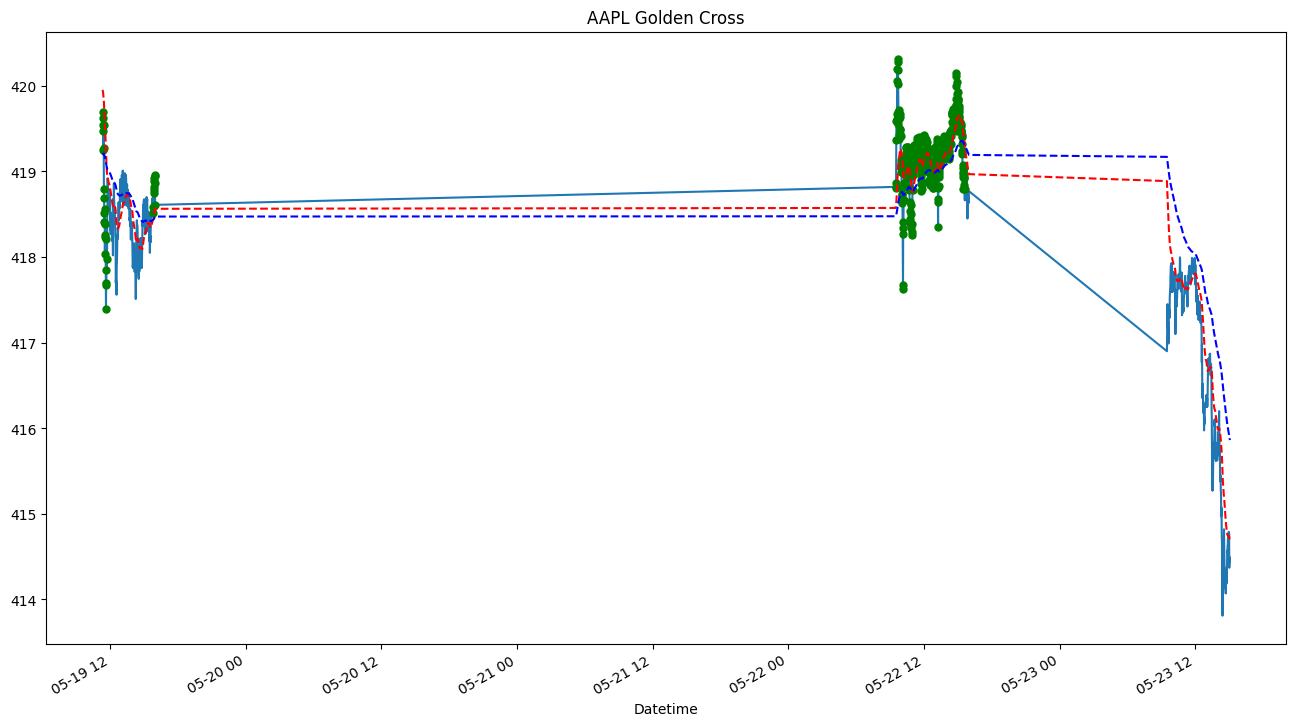

In [191]:
import pandas as pd
import pandas_ta as ta
import vectorbt as vbt
import matplotlib.pyplot as plt

df = pd.DataFrame().ta.ticker("SPY", period="700d", interval="1h") # requires 'yfinance' installed

# Create the "Golden Cross" 
df["GC"] = df.ta.ema(50, append=True) > df.ta.ema(200, append=True)
df.ta.macd(append=True)
print(df.columns)
df = df.iloc[-1000:]

# plot df
df["Close"].plot(figsize=(16, 9), title="AAPL Golden Cross")
# plot red dots where GC is True
plt.plot(df[df["GC"]].index, df[df["GC"]]["Close"], "g.", markersize=10)
# plot sma 50 and 200
plt.plot(df["EMA_50"], "r--", label="SMA 50")
plt.plot(df["EMA_200"], "b--", label="SMA 200")

# Create boolean Signals(TS_Entries, TS_Exits) for vectorbt
golden = df.ta.tsignals(df.GC & df["MACDh_12_26_9"] > 0, asbool=True, append=True)
# plot entries as big green vertical lines, exits as big red vertical lines
plt.vlines(golden.TS_Entries[golden.TS_Entries], 0, 500, color="g", linestyle="dashed")
# plt.vlines(golden.TS_Exits[golden.TS_Exits], 0, 500, color="r", linestyle="dashed")


# Sanity Check (Ensure data exists)
print(df)

# Create the Signals Portfolio
pf = vbt.Portfolio.from_signals(df["Close"], entries=golden.TS_Entries, exits=golden.TS_Exits, freq="H", init_cash=100_000, fees=0.0025, slippage=0.0025)

# Print Portfolio Stats and Return Stats
print(pf.stats())
print(pf.returns_stats())

In [192]:
import matplotlib.pyplot as plt

r = pf.daily_returns()
cash = 100000
all_vals = []
for i in range(len(r)):
    cash = cash * (1 + r[i])
    all_vals.append(cash)

print("total return", cash/100000)
print("min pf value", min(all_vals)/100000)
print("max pf value", max(all_vals)/100000)


# Plot the Portfolio Value
pf.value().vbt.plot()
# plt.show()

total return nan
min pf value 1.0000716679732888
max pf value 1.0000716679732888


/Users/shreyjoshi/dev/market-probe/venv/lib/python3.10/site-packages/vectorbt/generic/accessors.py:578: FutureWarning:

TimeGrouper.ax is deprecated and will be removed in a future version. Use Resampler.ax instead

/Users/shreyjoshi/dev/market-probe/venv/lib/python3.10/site-packages/vectorbt/generic/accessors.py:578: FutureWarning:

TimeGrouper.indexer is deprecated and will be removed in a future version. Use Resampler.indexer instead.

/Users/shreyjoshi/dev/market-probe/venv/lib/python3.10/site-packages/vectorbt/generic/accessors.py:590: FutureWarning:

TimeGrouper.ax is deprecated and will be removed in a future version. Use Resampler.ax instead

/Users/shreyjoshi/dev/market-probe/venv/lib/python3.10/site-packages/vectorbt/generic/accessors.py:590: FutureWarning:

TimeGrouper.obj is deprecated and will be removed in a future version. Use GroupBy.indexer instead.



FigureWidget({
    'data': [{'showlegend': False,
              'type': 'scatter',
              'uid': '077f018c-0909-4eb6-8fbe-bc0c37053c24',
              'x': array([datetime.datetime(2023, 5, 19, 11, 20, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2023, 5, 19, 11, 21, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2023, 5, 19, 11, 22, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          ...,
                          datetime.datetime(2023, 5, 23, 15, 2, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2023, 5, 23, 15, 3, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>),
                          datetime.datetime(2023, 5, 23, 15, 4, tzinfo=<DstTzInfo 'America/New_York' EDT-1 day, 20:00:00 DST>)],
                         dtype=object),
             

In [190]:
# percent of days with 0% return
print("percent of days with 0% return", len(r[r == 0])/len(r))
# percent of days with > 0% return
print("percent of days with > 0% return", len(r[r > 0])/len(r))
# percent of days with < 0% return
print("percent of days with < 0% return", len(r[r < 0])/len(r))

percent of days with 0% return 0.2
percent of days with > 0% return 0.0
percent of days with < 0% return 0.4


In [200]:
import pandas as pd
import pandas_ta as ta
import vectorbt as vbt

df = pd.DataFrame().ta.ticker("AAPL") # requires 'yfinance' installed

# Create the "Golden Cross" 
df["GC"] = df.ta.sma(50, append=True) > df.ta.sma(200, append=True)

# Create boolean Signals(TS_Entries, TS_Exits) for vectorbt

# Sanity Check (Ensure data exists)
print(df)

def sma_crossover_with_tp_sl(data, fast_window, slow_window, tp_level, sl_level):
    fast_sma = data.rolling(fast_window).mean()
    slow_sma = data.rolling(slow_window).mean()
    
    # Calculate the buy and sell signals
    buy_signal = fast_sma > slow_sma
    sell_signal = fast_sma < slow_sma
    
    # Apply take profit and stop loss levels
    take_profit = data >= (1 + tp_level) * data[buy_signal]
    stop_loss = data <= (1 - sl_level) * data[buy_signal]
    
    # Combine signals with take profit and stop loss conditions
    signals = buy_signal.copy()
    signals.loc[signals] &= ~take_profit
    signals.loc[signals] &= ~stop_loss
    
    return signals

golden = sma_crossover_with_tp_sl(df["Close"], 50, 200, 0.05, 0.05)


# Create the Signals Portfolio
pf = vbt.Portfolio.from_signals(df["Close"], entries=golden.TS_Entries, exits=golden.TS_Exits, freq="D", init_cash=100_000, fees=0.0025, slippage=0.0025)

# Print Portfolio Stats and Return Stats
print(pf.stats())
print(pf.returns_stats())

                                 Open        High         Low       Close   
Date                                                                        
1980-12-12 00:00:00-05:00    0.099584    0.100017    0.099584    0.099584  \
1980-12-15 00:00:00-05:00    0.094821    0.094821    0.094388    0.094388   
1980-12-16 00:00:00-05:00    0.087893    0.087893    0.087461    0.087461   
1980-12-17 00:00:00-05:00    0.089625    0.090058    0.089625    0.089625   
1980-12-18 00:00:00-05:00    0.092224    0.092657    0.092224    0.092224   
...                               ...         ...         ...         ...   
2023-05-17 00:00:00-04:00  171.710007  172.929993  170.419998  172.690002   
2023-05-18 00:00:00-04:00  173.000000  175.240005  172.580002  175.050003   
2023-05-19 00:00:00-04:00  176.389999  176.389999  174.940002  175.160004   
2023-05-22 00:00:00-04:00  173.979996  174.710007  173.449997  174.199997   
2023-05-23 00:00:00-04:00  173.130005  173.379395  171.274994  171.559998   

ValueError: Can only compare identically-labeled Series objects

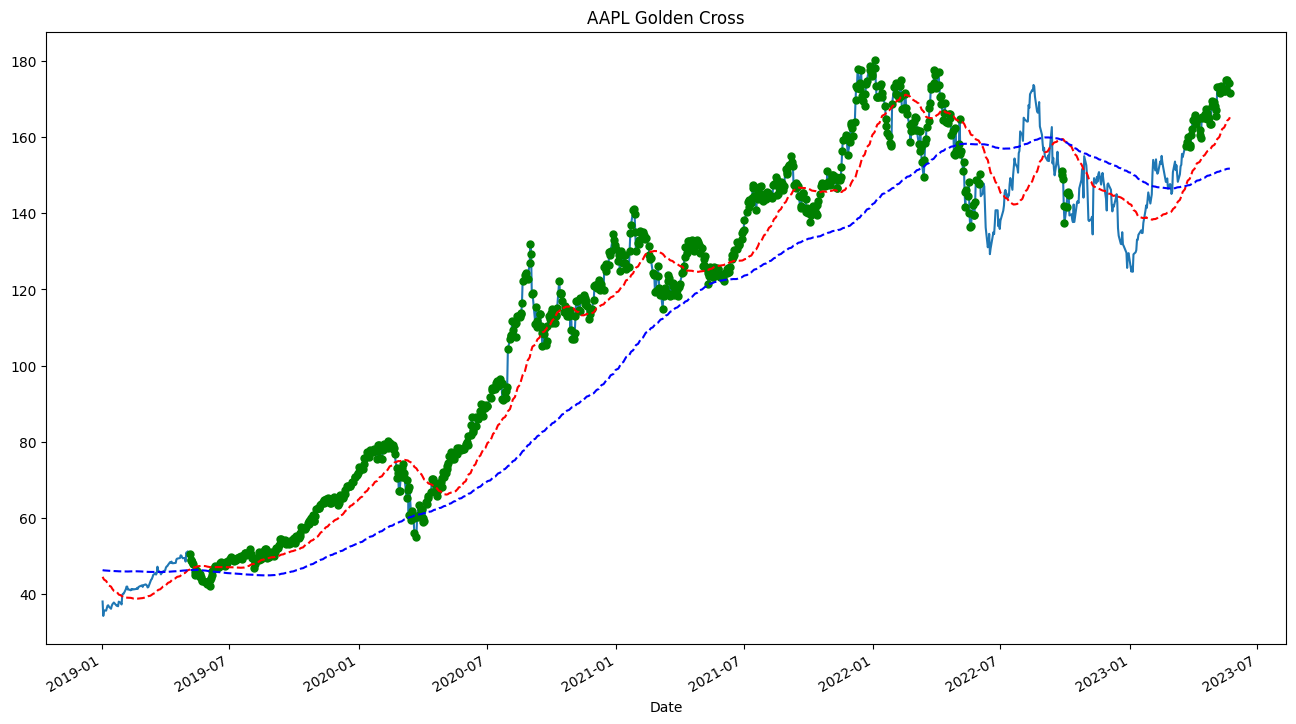

In [196]:
df = df[df.index >= "2019-01-01"]
df["Close"].plot(figsize=(16, 9), title="AAPL Golden Cross")
# plot red dots where GC is True
plt.plot(df[df["GC"]].index, df[df["GC"]]["Close"], "g.", markersize=10)
# plot sma 50 and 200
plt.plot(df["SMA_50"], "r--", label="SMA 50")
plt.plot(df["SMA_200"], "b--", label="SMA 200")